In [1]:
from econ_lib import data_dir
print(data_dir)

import numpy as np 
import pandas as pd

/Users/annaliang/Documents/Repositorites/econ6912-replication/src/data


In [2]:
mdata_filepath = data_dir / "monthly_data.xlsx"
mdata = pd.read_excel(mdata_filepath)
mdata

/Users/annaliang/Documents/Repositorites/econ6912-replication/.venv/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,year,month,CPI,IP,ff,gs1,gs2,ebp,mortg_spread_m,cp3m_spread_m,rents,cpinet,pce,pcenet,shelter
0,1979,7,73.000,53.2432,10.47,9.640000,9.140000,-0.223953,2.14,0.515,74.300,NaN,39.895,NaN,NaN
1,1979,8,73.700,52.8891,10.94,9.980000,9.460000,-0.317488,2.06,0.785,75.000,NaN,40.200,NaN,NaN
2,1979,9,74.400,52.9468,11.43,10.840000,10.060000,-0.089456,1.97,1.255,75.600,NaN,40.554,NaN,NaN
3,1979,10,75.200,53.2382,13.77,12.440000,11.490000,-0.912158,1.34,1.415,76.600,NaN,40.884,NaN,NaN
4,1979,11,76.000,53.1886,13.18,12.390000,11.810000,-0.166222,2.18,1.665,76.900,NaN,41.167,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2017,8,245.262,103.1956,1.16,1.229130,1.335217,-0.198700,NaN,NaN,309.479,216.826945,112.629,103.858953,307.096962
458,2017,9,246.392,103.1760,1.15,1.280000,1.384500,-0.390200,NaN,NaN,310.268,218.133130,113.077,104.317709,307.843829
459,2017,10,246.583,104.7647,1.15,1.397619,1.549524,-0.332600,NaN,NaN,311.501,217.949450,113.250,104.425229,308.849609
460,2017,11,247.411,105.2943,1.16,1.560000,1.696667,-0.257600,NaN,NaN,312.670,218.760072,113.483,104.617133,309.715400


In [3]:
# Apply transformations to full dataset
mdata.loc[:, ['CPI', 'IP', 'ff', 'rents']] = np.log(mdata.loc[:,['CPI', 'IP', 'ff', 'rents']])*100
mdata.iloc[:,10:15] = np.log(mdata.iloc[:,10:15])*100
mdata = mdata.fillna(0)
mdata = mdata.query("year >=1983 & month>=1")
mdata

,year,month,CPI,IP,ff,gs1,gs2,ebp,mortg_spread_m,cp3m_spread_m,rents,cpinet,pce,pcenet,shelter
42,1983,1,458.394655,389.538130,216.102153,8.620000,9.330000,0.328926,2.79,0.195000,612.817562,457.910874,394.839351,394.767543,460.342755
43,1983,2,458.496748,388.910437,214.124194,8.920000,9.640000,0.267022,2.32,0.115001,612.906253,457.955345,395.014696,394.917948,460.673749
44,1983,3,458.598737,389.722404,217.133681,9.040000,9.660000,0.215837,2.29,0.055000,612.950434,458.067460,395.151291,395.068140,460.735561
45,1983,4,459.309760,390.938152,217.475172,8.980000,9.570000,0.119112,2.38,0.205000,613.038471,458.753743,395.605903,395.460580,461.544715
46,1983,5,459.713801,391.615446,215.524451,8.900000,9.490000,-0.081389,2.25,0.025000,613.082327,459.209756,395.890659,395.759750,461.742474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2017,8,550.232703,463.662622,14.842001,1.229130,1.335217,-0.198700,0.00,0.000000,635.173880,537.909954,472.409923,464.303375,572.716353
458,2017,9,550.692376,463.643627,13.976194,1.280000,1.384500,-0.390200,0.00,0.000000,635.218268,538.510556,472.806900,464.744113,572.959260
459,2017,10,550.769865,465.171688,13.976194,1.397619,1.549524,-0.332600,0.00,0.000000,635.287371,538.426315,472.959776,464.847130,573.285446
460,2017,11,551.105092,465.675929,14.842001,1.560000,1.696667,-0.257600,0.00,0.000000,635.352591,538.797557,473.165305,465.030734,573.565381


In [4]:
pdata_filepath = data_dir / "monthly_factors.xlsx"
pdata = pd.read_excel(pdata_filepath)
pdata

/Users/annaliang/Documents/Repositorites/econ6912-replication/.venv/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
0,1991,1,-0.239541,-0.167419,-0.178065,-0.125161,-0.072258
1,1991,2,-0.103024,-0.230438,-0.092857,-0.092857,-0.062857
2,1991,3,-0.024090,-0.036336,-0.071290,-0.050645,-0.051290
3,1991,4,-0.028860,-0.032140,-0.040000,-0.040323,-0.094194
4,1991,5,-0.163372,-0.194634,-0.190312,-0.166563,-0.124687
...,...,...,...,...,...,...,...
307,2016,8,NaN,-0.004194,-0.012097,-0.016129,-0.020161
308,2016,9,NaN,-0.001667,0.001774,0.005323,0.005323
309,2016,10,NaN,-0.003387,0.003226,0.009677,0.009677
310,2016,11,NaN,0.000000,-0.004833,-0.009657,-0.009657


In [5]:
ppdata = mdata[['year', 'month']]
ppdata = ppdata.merge(pdata, on=['year', 'month'], how='left')
ppdata = ppdata.fillna(0)
# with pd.option_context('display.max_rows', None):
  # display(ppdata)
ppdata

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
0,1983,1,0.0,0.0,0.0,0.0,0.0
1,1983,2,0.0,0.0,0.0,0.0,0.0
2,1983,3,0.0,0.0,0.0,0.0,0.0
3,1983,4,0.0,0.0,0.0,0.0,0.0
4,1983,5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
415,2017,8,0.0,0.0,0.0,0.0,0.0
416,2017,9,0.0,0.0,0.0,0.0,0.0
417,2017,10,0.0,0.0,0.0,0.0,0.0
418,2017,11,0.0,0.0,0.0,0.0,0.0


In [6]:
from dataclasses import dataclass
from scripts.classes import VARStruct

# Define VAR struct with hardcoded variables
VAR = VARStruct(p=12, irhor=48, vars=mdata[['gs1', 'IP', 'ebp', 'CPI', 'rents']], proxies=ppdata[['ff4_tc']])

In [7]:
# function to create a lagged dataframe 
def lagmatrix(df, lags):
    lagged_df = pd.concat([df.shift(i) for i in lags], axis=1)
    return lagged_df


# A function to calculate the IRFs when k=1
def doIRFs(AL, Gamma, scale, VAR, n):
    gamma = np.array(Gamma)
    DT = scale * gamma/gamma[0]
    irs = np.zeros((VAR.p + VAR.irhor, n, DT.shape[1]))

    for jj in range(DT.shape[1]):
        irs[VAR.p,:,jj] = DT[:,jj]
        for tt in range(1,VAR.irhor):
            lvars = irs[VAR.p + tt:tt:-1, :, jj].T
            irs[VAR.p + tt, :, jj] = np.dot(lvars.flatten(), AL[:, :VAR.p * n].T)
    return irs[VAR.p:,:,:]

In [92]:
# funtion VAR = doProxySVAR(VAR)
from scripts.classes import ModelStruct


def doProxySVAR(VAR):
    lags = range(1,VAR.p+1)

    X_mat = lagmatrix(VAR.vars, lags)
    X_mat = X_mat.dropna().reset_index(drop=True)

    Y_mat = VAR.vars.iloc[VAR.p:].reset_index(drop=True)

    # VAR specification cont.
    m_array = np.asarray(VAR.proxies.iloc[VAR.p:].reset_index(drop=True))
    T_val = len(Y_mat)
    n_val = len(Y_mat.columns)
    k_val = m_array.shape[1]
    det = np.ones((VAR.vars.shape[0],1))

    # A. Run VAR
    # VAR.bet   = [X VAR.DET(VAR.p+1:end,:)]\Y; performs a linear regression 
    X_with_det = np.concatenate([X_mat, det[VAR.p:,:]], axis=1)
    # Use the normal equation which is equivalent to the \ operator in MATLAB
    bet = np.linalg.lstsq(X_with_det, Y_mat, rcond=None)[0]
    # Calculate the residuals 
    res = Y_mat - np.dot(X_with_det, bet)
    # Estimate the covariance matrix
    T_val = Y_mat.shape[0]
    sigma = np.dot(res.T, res) / (T_val - bet.shape[0])

    # B. Narrative Identification
    AL = bet[:-det.shape[1],:].T
    Gamma = (res.T @ m_array)/ T_val

    scale = -1
    irs = doIRFs(AL, Gamma, scale, VAR, n_val)

    # Assign values to model struct
    modelVAR = ModelStruct(m=m_array, k=k_val, Tval=T_val, n=n_val, bet=bet, res=res, \
                           det=det, Sigma=sigma, X=X_with_det, Gamma=Gamma, irs = irs[:,:,0])


    return modelVAR

In [93]:
modelVAR = doProxySVAR(VAR)
modelVAR.irs

array([[-1.00000000e+00, -1.62829445e-01, -8.54703954e-01,
         1.46988801e-01, -6.53437368e-02],
       [-1.92122539e-02, -1.46940798e+00, -1.55405137e-01,
         1.57042189e-01,  1.18995128e-02],
       [ 1.00070957e-01,  6.52510898e-02, -9.14307426e-01,
        -2.65156153e-02,  4.05790553e-03],
       [ 1.42034468e+00,  3.40850253e-01, -1.48291999e+00,
        -3.99883334e-01,  7.25410937e-02],
       [ 5.39257299e-01, -1.22067897e-01,  4.23872059e-01,
         5.26331131e-01, -1.08764297e+00],
       [ 5.21690235e-02, -2.22676997e+00,  4.33912614e-01,
        -8.86748859e-01, -2.96345752e-01],
       [-9.57059350e-02,  6.61539772e-01,  1.55052642e-01,
         7.21471348e-01,  9.88540645e-03],
       [ 1.97520223e+00,  1.72652976e+00, -2.06658570e+00,
         6.43395925e-01,  1.62702609e+00],
       [ 1.47320460e+00,  2.39443976e+00,  5.11712608e-01,
        -1.69918560e+00,  6.59140059e-01],
       [-3.74161782e+00,  3.39349997e+00,  3.50504690e+00,
        -1.68207315e+00

In [10]:
# Inference parameters
nboot = 5000; # Number of Bootstrap Samples (Paper does 5000)
clevel = 68; # Bootstrap Percentile Shown
BlockSize = int(np.floor(5.03*len(mdata)**0.25)); # size of blocks in the MBB bootstrap
seed = 2; # seed for random number generator
np.random.seed(seed)

In [11]:
# Define struct with SVAR results for confidence intervals
@dataclass
class VARciStruct:
    irsH: np.ndarray
    irsL: np.ndarray
    irs: np.ndarray
    irsHhall: np.ndarray
    irsLhall: np.ndarray



In [69]:
# Function to do 6: Jentsch and Lunsford Moving Block Bootstrap (adjusted to allow non zero-mean proxies)
# function VARci = doProxySVARci(VAR,clevel,method,nboot,BlockSize)

def doProxySVARci(VAR, modelVAR, clevel, method, nboot, BlockSize):
    irsL = np.nan * np.zeros((modelVAR.irs.shape[0], modelVAR.irs.shape[1], clevel))
    irsH = np.nan * np.zeros((modelVAR.irs.shape[0], modelVAR.irs.shape[1], clevel))
    # Newey West Lags
    NWlags = np.floor(4*(((len(VAR.vars) - VAR.p)/100) ** (2/9)))

    VARci = VARciStruct(irsH=irsH, irsL=irsL, irs=modelVAR.irs, irsHhall=irsH, irsLhall=irsL)

    
    return VARci

In [74]:
VARci = doProxySVARci(VAR, modelVAR, clevel, 'MBB', nboot, BlockSize)

In [12]:
nBlock = int(np.ceil(modelVAR.Tval/BlockSize))

# Create blocks and centerings
Blocks = np.zeros((BlockSize, modelVAR.n, modelVAR.Tval - BlockSize + 1))
MBlocks = np.zeros((BlockSize, modelVAR.k, modelVAR.Tval - BlockSize + 1))

for j in range(modelVAR.Tval - BlockSize + 1):
    Blocks[:, :, j] = modelVAR.res.iloc[j:j+BlockSize, :]
    MBlocks[:, :, j] = modelVAR.m[j:j+BlockSize, :]

# Center the bootstrapped VAR errors
centering = np.zeros((BlockSize, modelVAR.n))
for j in range(BlockSize):
    centering[j, :] = modelVAR.res.iloc[j:modelVAR.Tval - BlockSize + j, :].mean(axis=0)

centering = np.tile(centering, (nBlock, 1))
centering = centering[:modelVAR.Tval, :]

In [13]:
# Center the boostrapped proxy variables
Mcentering = np.zeros((BlockSize, modelVAR.k))

for j in range(BlockSize):
    subM = modelVAR.m[j:modelVAR.Tval - BlockSize + j, :]
    subM2 = np.asarray(VAR.proxies)

    # Filter rows where the first column is not zero
    subM_filtered = subM[subM[:, 0] != 0]
    subM2_filtered = subM2[subM2[:, 0] != 0]

    # Compute the means and assign to Mcentering
    Mcentering[j - 1, :] = subM_filtered[:, 0].mean() - subM2_filtered[:, 0].mean()

Mcentering = np.tile(Mcentering, (nBlock, 1))
Mcentering = Mcentering[:modelVAR.Tval, :]

In [78]:
jj = 1

IRS = np.zeros((240, nboot))

while jj < nboot:
    # draw bootstrapped residuals and proxies
    # generate random indices
    index = (np.ceil(modelVAR.Tval - BlockSize + 1) * np.random.rand(nBlock, 1)).astype(int)

    U_boot = np.zeros((nBlock * BlockSize, modelVAR.n))
    M_boot = np.zeros((nBlock * BlockSize, modelVAR.k))

    for j in range(nBlock):
        U_boot[BlockSize * j:BlockSize * (j + 1), :] = Blocks[:, :, index[j, 0] - 1]
        M_boot[BlockSize * j:BlockSize * (j + 1), :] = MBlocks[:, :, index[j, 0] - 1]
    
    U_boot = U_boot[:modelVAR.Tval, :]
    M_boot = M_boot[:modelVAR.Tval, :]

    # Center the bootstrapped residuals and proxies
    U_boot = U_boot - centering

    for j in range(modelVAR.k):
        non_zero_indices = M_boot[:, j] != 0
        M_boot[non_zero_indices, j] = M_boot[non_zero_indices, j] - Mcentering[non_zero_indices, j]

    resb = U_boot.T

    varsb = np.zeros((VAR.p + modelVAR.Tval, modelVAR.n))
    varsb[:VAR.p, :] = VAR.vars.iloc[:VAR.p, :]

    for j in range(VAR.p, VAR.p + modelVAR.Tval):
        lvars = varsb[j:j-VAR.p:-1, :].T
        varsb[j, :] = (lvars.flatten() @ modelVAR.bet[:VAR.p * modelVAR.n, :]) \
                + (modelVAR.det[j, :] @ modelVAR.bet[VAR.p * modelVAR.n:, :]) + resb[:, j - VAR.p]

    proxies = np.vstack((VAR.proxies.iloc[:VAR.p, :], M_boot))

    VARBS = VARStruct(p=VAR.p, irhor=VAR.irhor, vars=pd.DataFrame(varsb), proxies=pd.DataFrame(proxies))

    modelVARBS = doProxySVAR(VARBS)

    # for i in range(modelVARBS.irs.shape[2]):
    irs = modelVARBS.irs[:, :]
    IRS[:, jj] = irs.flatten()

    jj += 1

In [91]:
modelVAR.irs.shape

(48, 5, 1)

In [94]:
# Initialize irsH, irsL, and irs with zeros
irsHBS = np.zeros((VAR.irhor, modelVAR.irs.shape[1]))
irsLBS = np.zeros((VAR.irhor, modelVAR.irs.shape[1]))
irsBS = np.zeros((VAR.irhor, modelVAR.irs.shape[1]))

# Initialize irsHhall and irsLhall with zeros
irsHhallBS = np.zeros((VAR.irhor, modelVAR.irs.shape[1]))
irsLhallBS = np.zeros((VAR.irhor, modelVAR.irs.shape[1]))

# Confidence Bands
##################

irsHBS[:, :] = np.quantile(IRS[:, :].T, (1 - clevel / 100) / 2, axis=0).reshape(VAR.irhor, modelVAR.irs.shape[1])
irsLBS[:, :] = np.quantile(IRS[:, :].T, 1 - (1 - clevel / 100) / 2, axis=0).reshape(VAR.irhor, modelVAR.irs.shape[1])
irsBS[:, :] = np.quantile(IRS[:, :].T, 1 - (1 - 50 / 100), axis=0).reshape(VAR.irhor, modelVAR.irs.shape[1])

virs = modelVAR.irs[:, :]
irsHhallBS[:, :] = modelVAR.irs[:, :] - np.quantile((IRS[ :, :].T - np.tile(virs.flatten(), (nboot, 1))), (1 - clevel / 100) / 2, axis=0).reshape(VAR.irhor, modelVAR.irs.shape[1])
irsLhallBS[:, :] = modelVAR.irs[:, :] - np.quantile((IRS[:, :].T - np.tile(virs.flatten(), (nboot, 1))), 1 - (1 - clevel / 100) / 2, axis=0).reshape(VAR.irhor, modelVAR.irs.shape[1])

In [95]:
VARci = VARciStruct(irsH=irsHBS, irsL=irsLBS, irs=irsBS, irsHhall=irsHhallBS, irsLhall=irsLhallBS)

In [103]:
shocksize = -0.25
shock = 1

In [107]:
modelVAR.irs = modelVAR.irs * shocksize
VARci.irsH = VARci.irsH * shocksize
VARci.irsL = VARci.irsL * shocksize
VARci.irs = VARci.irs * shocksize

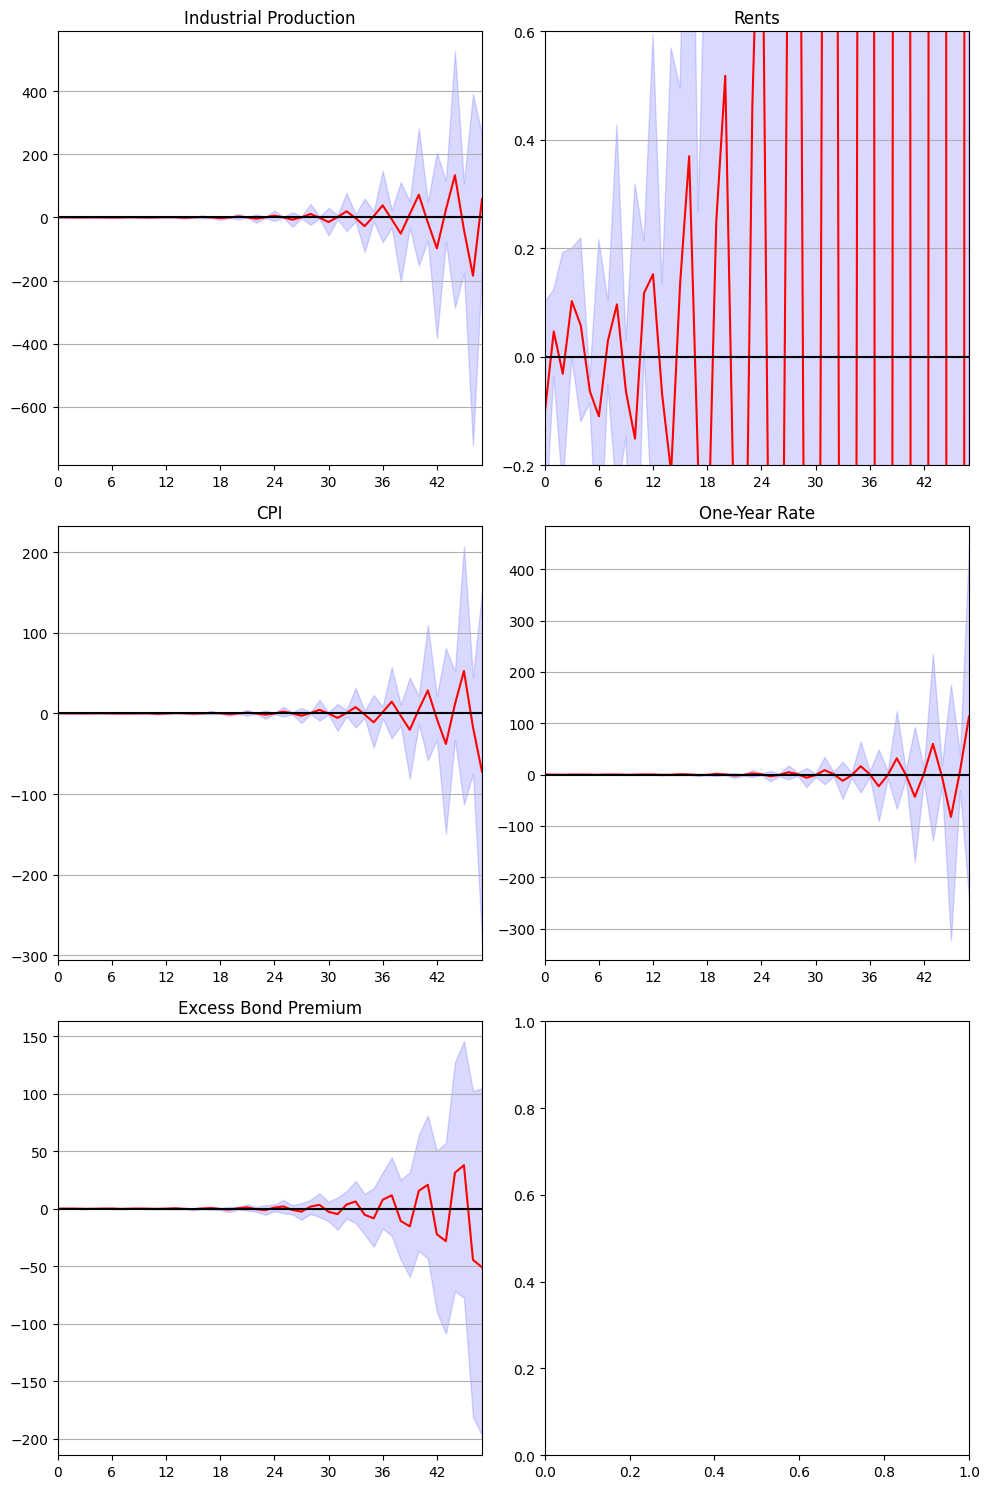

In [110]:
import matplotlib.pyplot as plt

plotdisplay = ['IP', 'RENTS', 'CPI', 'GS1', 'EBP']
FigLabels = ['Industrial Production', 'Rents', 'CPI', 'One-Year Rate', 'Excess Bond Premium']

display1 = np.array([1,4,3,0,2])

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten()

for nvar in range(len(display1)):
    if VARci is not None:
        ax = axes[nvar]
        h, = ax.plot(range(VAR.irhor), VARci.irs[:, display1[nvar]], 'r', linewidth=1.5)
        
        if nvar == 1:
            ax.set_ylim([-0.2, 0.6])
            ax.set_yticks(np.arange(-0.2, 0.7, 0.2))
        
        ax.set_xlim([0, VAR.irhor - 1])
        
        if VARci.irsH is not None:
            ax.fill_between(range(VAR.irhor), VARci.irsH[:, display1[nvar]], VARci.irsL[:, display1[nvar]], color='blue', alpha=0.15)
        
        ax.axhline(0, color='k', linestyle='-')
        title_text = FigLabels[nvar]
        ax.set_title(title_text, fontsize=12)
        ax.set_xticks(np.arange(0, VAR.irhor, 6))
        ax.grid(True)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

